```
다음 코드를 실행시켜보면 Test Accuracy는 약 85%가 나오는데 Train Accuracy는 100%가 나오는 것을 볼 수 있습니다. 명백한 과적합이죠.

머신러닝에서도 그랬지만 학습 데이터에서만 잘 작동하는 모델을 만들면 결국 사용할 수 없게 됩니다. 새로운 어떤 데이터가 들어와도 안정적인 모델을 만들어야하는데요. 그러면 어떻게 해야 이러한 모델을 만들수 있을까요?

모델 성능향상을 위해서는 데이터를 추가하거나 알고리즘을 최적화 하는 방법이 있습니다.

딥러닝은 머신러닝과 달리 데이터를 증가시키거나 데이터를 가상으로 생성하는 방법론들이 있습니다.

또한 이상치를 제외하는 방법도 있구요. 시그모이드 함수를 조정하는 방법도 좋을 예입니다. 그리고 교차검증 방법을 사용할수도 있고, 다른 구조로 모델을 바꾸는 것도 방법입니다. 은닉층의 개수 조정, 노드수, 최적화 함수조정등도 방법입니다.

그리고 무조건 딥러닝만 의존하는 것이 아닌 적절한 머신러닝 방법론으로 대체하는것도 방법입니다.

이 과적합 문제는 결국 많은 데이터를 다뤄보고 경우에 따라 다양한 방법을 모두 적용하는것이 사실은 정답입니다.
```

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test))

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 2s 38ms/step - loss: 0.7035 - accuracy: 0.4500 - val_loss: 0.7187 - val_accuracy: 0.2500
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.7163 - val_accuracy: 0.3000
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5125 - val_loss: 0.7135 - val_accuracy: 0.2500
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.5375 - val_loss: 0.7090 - val_accuracy: 0.3500
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.5875 - val_loss: 0.7071 - val_accuracy: 0.4500
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6839 - accuracy: 0.6125 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6806 - accuracy: 0.6500 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 8/200


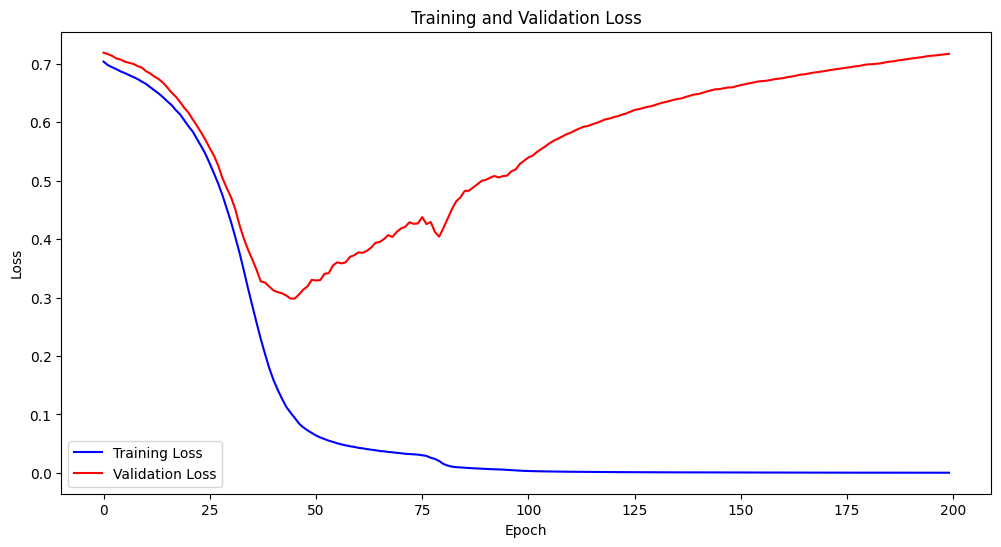

In [2]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

---

Early stopping

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 모델 학습 (early stopping 적용)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 1s 17ms/step - loss: 0.7077 - accuracy: 0.5125 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.7118 - val_accuracy: 0.5500
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5125 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.5750 - val_loss: 0.7037 - val_accuracy: 0.6500
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5875 - val_loss: 0.7006 - val_accuracy: 0.6500
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6375 - val_loss: 0.6974 - val_accuracy: 0.6500
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6634 - accuracy: 0.6250 - val_loss: 0.6944 - val_accuracy: 0.5500
Epoch 8/200


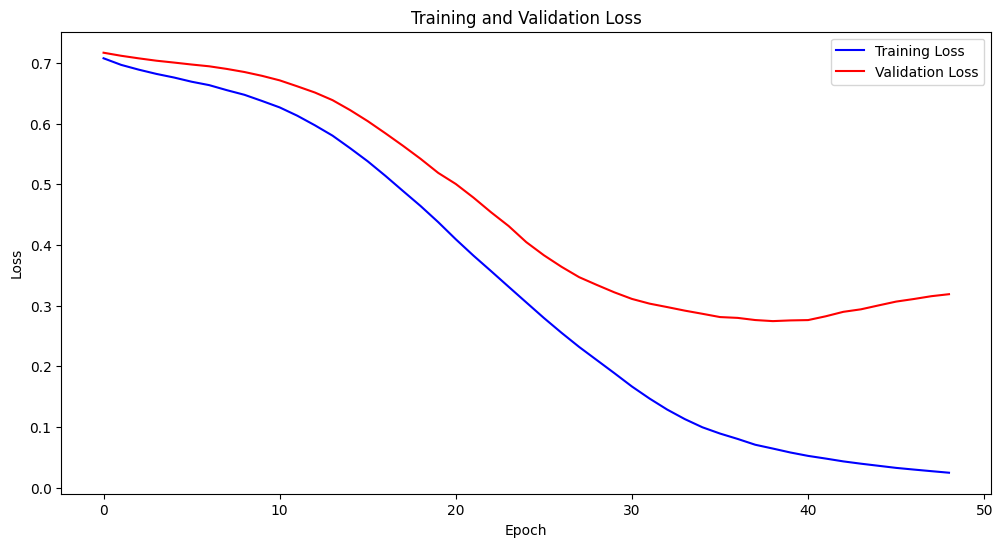

In [4]:
# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

K-fold

In [6]:
from sklearn.model_selection import StratifiedKFold

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

val_acc_list = []
fold_num = 1
results = {}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 구조 정의
    model = Sequential([
        Dense(128, activation='relu', input_dim=20),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 검증 데이터로 평가
    _, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_acc_list.append(val_acc)

    # 각 fold의 결과 저장
    results[f"Fold {fold_num} Accuracy"] = val_acc
    fold_num += 1

In [8]:
results

# K-fold 결과 출력
print(f"5-fold Validation Accuracy: {np.mean(val_acc_list):.4f} ± {np.std(val_acc_list):.4f}")

5-fold Validation Accuracy: 0.8700 ± 0.0245


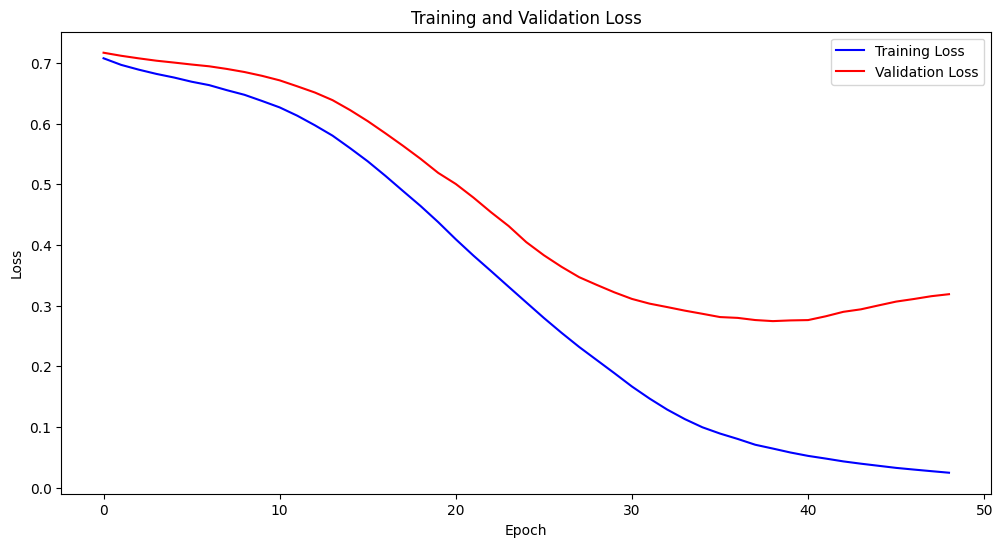

In [9]:
# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()